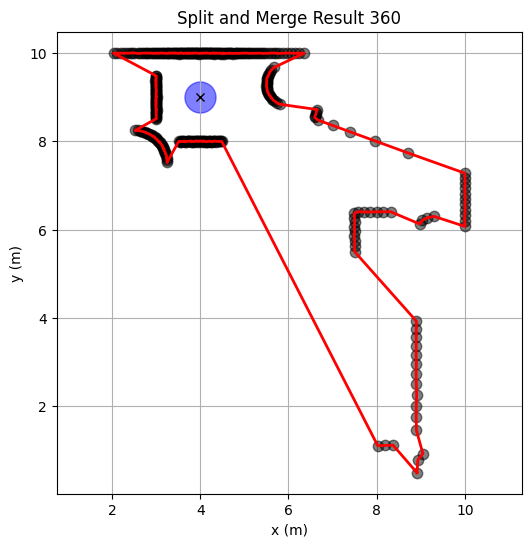

Total points: 360
Number of segments: 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/rangeData_4_9_360 - rangeData_4_9_360.csv.csv',header=None).values

# Robot position
xr, yr = data[0]

# Lidar scan (theta, rho)
scan = data[1:]



# Threshold

LINE_POINT_DIST_THRESHOLD = 0.7
MIN_POINTS_PER_SEGMENT = 3
MIN_SEG_LENGTH = 0.1
MAX_P2P_DIST = 0.2



# Convertion of  polar to cartesian

def polar_to_cartesian(scan, xr, yr):
    theta = scan[:, 0]
    rho = scan[:, 1]

    valid = np.isfinite(rho) & (rho > 0)
    theta = theta[valid]
    rho = rho[valid]

    x = xr + rho * np.cos(theta)
    y = yr + rho * np.sin(theta)

    return np.column_stack((x, y))



# Fit line using y=mx+c

def fit_line_normal(points):
    x = points[:, 0]
    y = points[:, 1]

    xm = np.mean(x)
    ym = np.mean(y)

    x_c = x - xm
    y_c = y - ym

    Sxx = np.sum(x_c ** 2)
    Syy = np.sum(y_c ** 2)
    Sxy = np.sum(x_c * y_c)

    alpha = 0.5 * np.arctan2(2 * Sxy, Sxx - Syy)
    r = xm * np.cos(alpha) + ym * np.sin(alpha)

    return r, alpha


def point_line_dist(point, r, alpha):
    x, y = point
    return abs(x * np.cos(alpha) + y * np.sin(alpha) - r)



# Split and merge algorithm

def split_and_merge(points, depth=0, max_depth=50):
    if len(points) < MIN_POINTS_PER_SEGMENT or depth >= max_depth:
        return []

    r, alpha = fit_line_normal(points)

    dists = []
    for p in points:
        dists.append(point_line_dist(p, r, alpha))
    dists = np.array(dists)

    max_idx = np.argmax(dists)
    max_dist = dists[max_idx]

    if max_dist > LINE_POINT_DIST_THRESHOLD and max_idx > 0 and max_idx < len(points) - 1:
        left = split_and_merge(points[:max_idx + 1], depth + 1)
        right = split_and_merge(points[max_idx:], depth + 1)
        return left + right

    length = np.linalg.norm(points[-1] - points[0])
    if length >= MIN_SEG_LENGTH:
        return [points]

    return []


def plot_segments(points, segments, title_text):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], '.', markersize=15,color='black',alpha=.5)

    for seg in segments:
        plt.plot(seg[:, 0], seg[:, 1], '-r', linewidth=2)

    plt.plot(xr, yr, 'kx')  # robot
    plt.scatter(xr, yr,color='b',s=500,alpha=.5)
    plt.title(title_text)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid(True)
    plt.show()


# Main

points = polar_to_cartesian(scan, xr, yr)
segments = split_and_merge(points)

plot_segments(
    points,
    segments,
    "Split and Merge Result 360"
)

print("Total points:", len(points))
print("Number of segments:", len(segments))


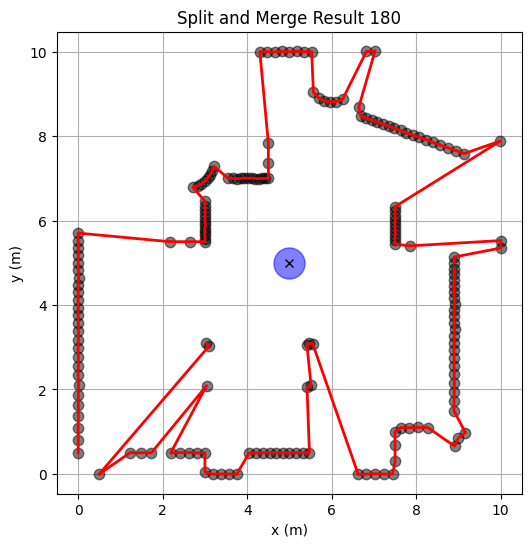

Total points: 180
Number of segments: 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/rangeData_5_5_180 - rangeData_5_5_180.csv.csv',header=None).values

# Robot position
xr, yr = data[0]

# Lidar scan (theta, rho)
scan = data[1:]



# Threshold

LINE_POINT_DIST_THRESHOLD = 0.5
MIN_POINTS_PER_SEGMENT = 3
MIN_SEG_LENGTH = 0.55
MAX_P2P_DIST = 0.5



# Convertion of  polar to cartesian

def polar_to_cartesian(scan, xr, yr):
    theta = scan[:, 0]
    rho = scan[:, 1]

    valid = np.isfinite(rho) & (rho > 0)
    theta = theta[valid]
    rho = rho[valid]

    x = xr + rho * np.cos(theta)
    y = yr + rho * np.sin(theta)

    return np.column_stack((x, y))



# Fit line using y=mx+c

def fit_line_normal(points):
    x = points[:, 0]
    y = points[:, 1]

    xm = np.mean(x)
    ym = np.mean(y)

    x_c = x - xm
    y_c = y - ym

    Sxx = np.sum(x_c ** 2)
    Syy = np.sum(y_c ** 2)
    Sxy = np.sum(x_c * y_c)

    alpha = 0.5 * np.arctan2(2 * Sxy, Sxx - Syy)
    r = xm * np.cos(alpha) + ym * np.sin(alpha)

    return r, alpha


def point_line_dist(point, r, alpha):
    x, y = point
    return abs(x * np.cos(alpha) + y * np.sin(alpha) - r)



# Split and merge algorithm

def split_and_merge(points, depth=0, max_depth=50):
    if len(points) < MIN_POINTS_PER_SEGMENT or depth >= max_depth:
        return []

    r, alpha = fit_line_normal(points)

    dists = []
    for p in points:
        dists.append(point_line_dist(p, r, alpha))
    dists = np.array(dists)

    max_idx = np.argmax(dists)
    max_dist = dists[max_idx]

    if max_dist > LINE_POINT_DIST_THRESHOLD and max_idx > 0 and max_idx < len(points) - 1:
        left = split_and_merge(points[:max_idx + 1], depth + 1)
        right = split_and_merge(points[max_idx:], depth + 1)
        return left + right

    length = np.linalg.norm(points[-1] - points[0])
    if length >= MIN_SEG_LENGTH:
        return [points]

    return []


def plot_segments(points, segments, title_text):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], '.', markersize=15,color='black',alpha=.5)

    for seg in segments:
        plt.plot(seg[:, 0], seg[:, 1], '-r', linewidth=2)

    plt.plot(xr, yr, 'kx')  # robot
    plt.scatter(xr, yr,color='b',s=500,alpha=.5)
    plt.title(title_text)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid(True)
    plt.show()


# Main

points = polar_to_cartesian(scan, xr, yr)
segments = split_and_merge(points)

plot_segments(
    points,
    segments,
    "Split and Merge Result 180"
)

print("Total points:", len(points))
print("Number of segments:", len(segments))


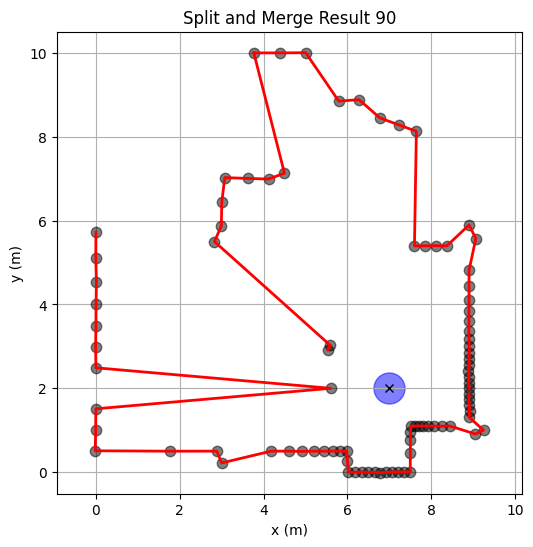

Total points: 90
Number of segments: 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/rangeData_7_2_90 - rangeData_7_2_90.csv.csv',header=None).values

# Robot position
xr, yr = data[0]

# Lidar scan (theta, rho)
scan = data[1:]



# Threshold

LINE_POINT_DIST_THRESHOLD = 0.6
MIN_POINTS_PER_SEGMENT = 3
MIN_SEG_LENGTH = 0.5
MAX_P2P_DIST = 0.4



# Convertion of  polar to cartesian

def polar_to_cartesian(scan, xr, yr):
    theta = scan[:, 0]
    rho = scan[:, 1]

    valid = np.isfinite(rho) & (rho > 0)
    theta = theta[valid]
    rho = rho[valid]

    x = xr + rho * np.cos(theta)
    y = yr + rho * np.sin(theta)

    return np.column_stack((x, y))



# Fit line using y=mx+c

def fit_line_normal(points):
    x = points[:, 0]
    y = points[:, 1]

    xm = np.mean(x)
    ym = np.mean(y)

    x_c = x - xm
    y_c = y - ym

    Sxx = np.sum(x_c ** 2)
    Syy = np.sum(y_c ** 2)
    Sxy = np.sum(x_c * y_c)

    alpha = 0.5 * np.arctan2(2 * Sxy, Sxx - Syy)
    r = xm * np.cos(alpha) + ym * np.sin(alpha)

    return r, alpha


def point_line_dist(point, r, alpha):
    x, y = point
    return abs(x * np.cos(alpha) + y * np.sin(alpha) - r)



# Split and merge algorithm

def split_and_merge(points, depth=0, max_depth=50):
    if len(points) < MIN_POINTS_PER_SEGMENT or depth >= max_depth:
        return []

    r, alpha = fit_line_normal(points)

    dists = []
    for p in points:
        dists.append(point_line_dist(p, r, alpha))
    dists = np.array(dists)

    max_idx = np.argmax(dists)
    max_dist = dists[max_idx]

    if max_dist > LINE_POINT_DIST_THRESHOLD and max_idx > 0 and max_idx < len(points) - 1:
        left = split_and_merge(points[:max_idx + 1], depth + 1)
        right = split_and_merge(points[max_idx:], depth + 1)
        return left + right

    length = np.linalg.norm(points[-1] - points[0])
    if length >= MIN_SEG_LENGTH:
        return [points]

    return []


def plot_segments(points, segments, title_text):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], '.', markersize=15,color='black',alpha=.5)

    for seg in segments:
        plt.plot(seg[:, 0], seg[:, 1], '-r', linewidth=2)

    plt.plot(xr, yr, 'kx')  # robot
    plt.scatter(xr, yr,color='b',s=500,alpha=.5)
    plt.title(title_text)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid(True)
    plt.show()


# Main

points = polar_to_cartesian(scan, xr, yr)
segments = split_and_merge(points)

plot_segments(
    points,
    segments,
    "Split and Merge Result 90"
)


